In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

%matplotlib inline
DATASET_PATH = 'train.csv'
DATASET_2_PATH = 'test.csv'
PREPARED_DATASET_PATH = 'JaneCalm_predictions.csv'
test = pd.read_csv(DATASET_2_PATH)
train = pd.read_csv(DATASET_PATH)

In [2]:
train.shape

(10000, 20)

In [3]:
train.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


### Очистка данных

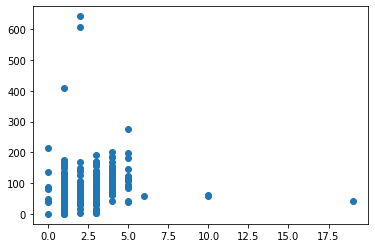

In [5]:
plt.scatter(train.Rooms, train.Square)

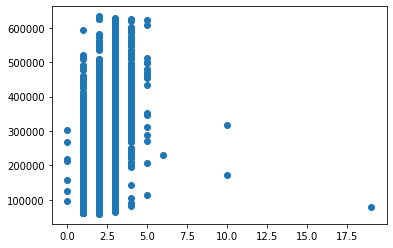

In [6]:
plt.scatter(train.Rooms, train.Price)

In [7]:
train.loc[train['Square'] < train['LifeSquare']]


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,309688.592681
153,9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,131797.472284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,41,30,2.0,59.015896,59.439082,12.0,5,5.0,2016,0.000078,B,B,22,6398,141,1046.0,3,23,B,126281.142781
9889,12918,23,2.0,51.440463,53.134243,51.0,3,17.0,2017,0.005767,B,B,1,388,0,NaN,0,0,B,88150.012510
9895,2737,27,3.0,123.430072,125.806981,123.0,5,10.0,2015,0.017647,B,B,2,469,0,NaN,0,0,B,234194.837047
9902,14001,73,1.0,44.098768,44.267551,1.0,7,24.0,2014,0.042032,B,B,37,6856,84,1940.0,2,5,B,381937.404161


In [8]:
mean_year = np.round(train.loc[train['HouseYear'] <= 2020, 'HouseYear'].mean())
mean_healthcare = np.round(train["Healthcare_1"].mean())
mean_square_for_max = train.loc[(train['Rooms'] <= train.loc[(train['Square'] > 300), 'Rooms'].mean()), 'Square'].mean()
mean_square_for_big_ls = train.loc[train['LifeSquare'] > 250, 'Square'].mean()

In [9]:
def clean_year(df, mean_year):
    df.loc[df['HouseYear'] > 2020, 'HouseYear'] = mean_year

In [10]:
def clean_life_square(df):
    df.loc[(df['LifeSquare'] < 5) | (df['LifeSquare'].isnull()) | (df['LifeSquare'] > 250) | (df['Square'] < df['LifeSquare']), 'LifeSquare'] = df['Square']*0.85

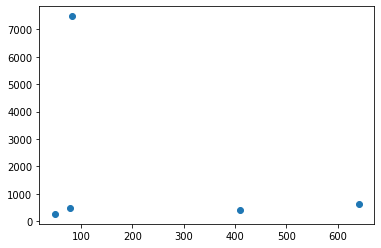

In [11]:
square2 = train.loc[train['LifeSquare'] > 250].copy()
plt.scatter(square2.Square, square2.LifeSquare)

In [12]:
square2

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,NaN,0,2,B,141780.231857
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.492366
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,2300.0,1,7,B,394253.299978


In [13]:
train.loc[(train['Square'] > 200), ('Id', 'Square', 'Rooms', 'Price', 'LifeSquare', 'HouseYear')].head(20)

,Id,Square,Rooms,Price,LifeSquare,HouseYear
1981,7917,212.932361,0.0,302211.260887,211.231125,2008
1982,5548,275.645284,5.0,455264.882666,233.949309,2011
4262,28,604.705972,2.0,187717.242538,NaN,1977
4690,2307,409.425181,1.0,90470.430830,410.639749,2016
6977,11602,641.065193,2.0,133529.681562,638.163193,2019
9910,16568,200.334539,4.0,528560.506016,201.627361,2013


In [14]:
def clean_square(df, mean_square_for_max):
    df.loc[(df['Square'] > 300), 'Square'] = mean_square_for_max

In [15]:
def clean_healthcare_1(df, mean_healthcare):
    df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = mean_healthcare

In [16]:
def clean_rooms(df):
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] < 30), 'Rooms'] = 1
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 30) & (df['LifeSquare'] < 45), 'Rooms'] = 2
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 45) & (df['LifeSquare'] < 60), 'Rooms'] = 3
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 60) & (df['LifeSquare'] < 75), 'Rooms'] = 4
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 70), 'Rooms'] = 6
    df.loc[(df['Rooms'] > 10), 'Rooms'] = 2

In [17]:
def prepare_data(df, mean_year=mean_year, mean_healthcare=mean_healthcare, mean_square_for_max=mean_square_for_max):
    clean_year(df, mean_year)
    clean_square(df, mean_square_for_max)
    clean_life_square(df)
    clean_healthcare_1(df, mean_healthcare)
    clean_rooms(df)


In [18]:
prepare_data(train)
prepare_data(test)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null float64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(9), int64(8), object(3)
memory usage: 1.5+ MB


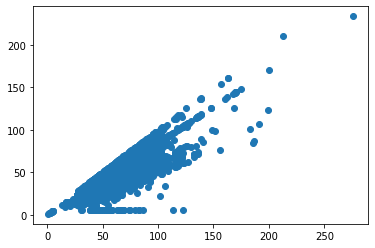

In [20]:
plt.scatter(train.Square, train.LifeSquare)

#### Готовимся к обучению

In [21]:
X = pd.get_dummies(train)
X.drop("Price", axis=1, inplace=True)
X.drop("Id", axis=1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null float64
Ecology_1        10000 non-null float64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Ecology_2_A      10000 non-null uint8
Ecology_2_B      10000 non-null uint8
Ecology_3_A      10000 non-null uint8
Ecology_3_B      10000 non-null uint8
Shops_2_A        10000 non-null uint8
Shops_2_B        10000 non-null uint8
dtypes: float64(8), int64(7), uint8(6)
memory usage: 1.2 MB


In [22]:
y = train.Price
y.count()

10000

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=28)

### Обучаем модель

from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [18, 100],
    'max_features': [3, 5, 7],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 8, 6],
    'n_estimators': [100, 1000],
    'random_state': [2, 28, 42, 40]
}
grid_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, cv = 3, n_jobs = 3)

grid_search.fit(X_train, y_train)
grid_search.best_params_

In [24]:
model = RandomForestRegressor(n_estimators=1000, max_depth=100, max_features=5, min_samples_leaf=2, 
                              min_samples_split=6, random_state=30, verbose=0)

In [25]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=6,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=30, verbose=0,
                      warm_start=False)

In [26]:
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)

In [27]:
r2_score(y_train, y_pred_train)

0.9060466172692201

In [28]:
r2_score(y_valid, y_pred)

0.742890194274296

In [29]:
model.feature_importances_

array([4.71867071e-02, 1.26065058e-01, 2.55509024e-01, 1.00339344e-01,
       4.32588630e-02, 2.26437984e-02, 2.57984672e-02, 3.58302135e-02,
       3.91372037e-02, 7.26939340e-02, 8.23506945e-02, 6.48896518e-02,
       2.72542196e-02, 2.43787731e-02, 2.87219481e-02, 2.15556405e-04,
       2.48755526e-04, 8.85919171e-04, 9.34475648e-04, 9.10548990e-04,
       7.46844656e-04])

In [30]:
X_test = pd.get_dummies(test)
X_test.drop("Id", axis=1, inplace=True)
X_test

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,58,2.0,49.882643,33.432782,6.0,6,14.0,1972.0,0.310199,11,...,1,1143.0,0,0,0,1,0,1,0,1
1,74,2.0,69.263183,58.873706,1.0,6,1.0,1977.0,0.075779,6,...,3,1143.0,0,2,0,1,0,1,0,1
2,190,1.0,13.597819,11.558146,12.0,2,5.0,1909.0,0.000000,30,...,87,4702.0,5,5,0,1,0,1,0,1
3,47,2.0,73.046609,51.940842,9.0,22,22.0,2007.0,0.101872,23,...,3,1143.0,3,3,0,1,0,1,0,1
4,27,1.0,47.527111,43.387569,1.0,17,17.0,2017.0,0.072158,2,...,1,1143.0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,3.0,67.133911,50.809797,6.0,5,9.0,1973.0,0.000170,36,...,0,1143.0,1,1,0,1,0,1,0,1
4996,1,1.0,40.198472,21.807061,10.0,12,17.0,2017.0,0.007122,1,...,0,1143.0,0,1,0,1,0,1,0,1
4997,12,3.0,77.842178,48.282625,9.0,23,22.0,1989.0,0.090799,74,...,2,1143.0,5,15,0,1,0,1,0,1
4998,62,2.0,81.305222,69.109439,0.0,4,0.0,1977.0,0.072158,2,...,1,1143.0,0,0,0,1,0,1,1,0


In [31]:
test["Price"] = model.predict(X_test)

In [32]:
test.loc[:, ['Id', 'Price']].to_csv('JaneCalm_predictions2.csv', index=False)